## Simple Linear Regression Ex 1: Swedish Car Insurance

In this exercise we will build a simple linear regression model using the number of car insurance claims in  predicting the amount paid out from the number of Swedish car insurance claims.

In [1]:
import pandas as pd
import matplotlib.pyplot as plot
import statsmodels.api as stats
import numpy as np

### Loading Our Data

In [2]:
insurance_df = pd.read_csv('auto_insurance_sweden.csv')

In [3]:
insurance_df

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4
...,...,...
58,9,87.4
59,31,209.8
60,14,95.5
61,53,244.6


### Assessing the Data

In [4]:
insurance_df.shape

(63, 2)

In [5]:
insurance_df.head()

,claims,payment
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


### Visualisation of the Data

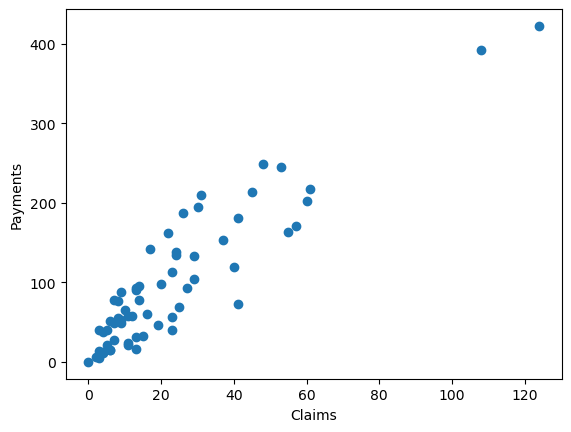

In [11]:
plot.scatter(insurance_df['claims'], insurance_df['payment'])
plot.xlabel('Claims')
plot.ylabel('Payments')
plot.show()

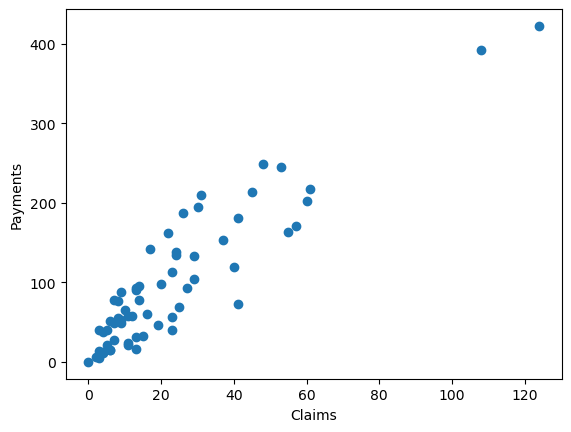

In [6]:
plot.scatter(insurance_df['claims'], insurance_df['payment'])
plot.xlabel('Claims')
plot.ylabel('Payments')
plot.show()

### Fitting the Linear Regression Model

In [18]:
# To seperate the target variable y from the independent variable x
Y_insurance = insurance_df['payment']
X_insurance = stats.add_constant(insurance_df['claims'])

In [21]:
Y_insurance

0     392.5
1      46.2
2      15.7
3     422.2
4     119.4
      ...  
58     87.4
59    209.8
60     95.5
61    244.6
62    187.5
Name: payment, Length: 63, dtype: float64

In [22]:
X_insurance

,const,claims
0,1.0,108
1,1.0,19
2,1.0,13
3,1.0,124
4,1.0,40
...,...,...
58,1.0,9
59,1.0,31
60,1.0,14
61,1.0,53


In [23]:
model_insurance = stats.OLS(Y_insurance, X_insurance)
results_insurance = model_insurance.fit()

In [25]:
results_insurance

In [20]:
print(results_insurance.summary())

                            OLS Regression Results                            
Dep. Variable:                payment   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     305.0
Date:                Sun, 08 Oct 2023   Prob (F-statistic):           2.05e-25
Time:                        14:22:55   Log-Likelihood:                -314.04
No. Observations:                  63   AIC:                             632.1
Df Residuals:                      61   BIC:                             636.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.9945      6.368      3.140      0.0

### Viewing Line Parameters

In [26]:
intercept_insurance = results_insurance.params[0]
claims_coeff = results_insurance.params[1]
ssr_insurance = results_insurance.ssr

print('The intercept value is {:.3f}'.format(intercept_insurance))
print('The coefficient (slope) for the claims independent variable is {:.3f}'.format(claims_coeff))
print('The sum of square residuals is {:.1f}'.format(ssr_insurance))

The intercept value is 19.994
The coefficient (slope) for the claims independent variable is 3.414
The sum of square residuals is 78796.7


### Plotting Results

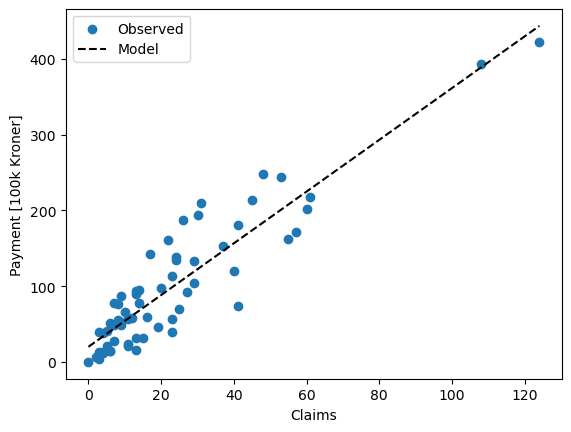

In [28]:
x_synthetic = np.linspace(0,insurance_df['claims'].max(), 50)
y_pred_insurance = claims_coeff*x_synthetic + intercept_insurance
plot.scatter(insurance_df.claims, insurance_df.payment, label='Observed')
plot.plot(x_synthetic, y_pred_insurance, color='k', ls='--', label='Model')
plot.xlabel('Claims')
plot.ylabel('Payment [100k Kroner]')
plot.legend()
plot.show()